In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load data
df = pd.read_csv('Task 3 and 4_Loan_Data.csv')

In [13]:
display(df['fico_score'].min())
df['fico_score'].max()

np.int64(408)

np.int64(850)

/tmp/ipykernel_107625/2543629939.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['default'], y=df['fico_score'], palette='Set2')


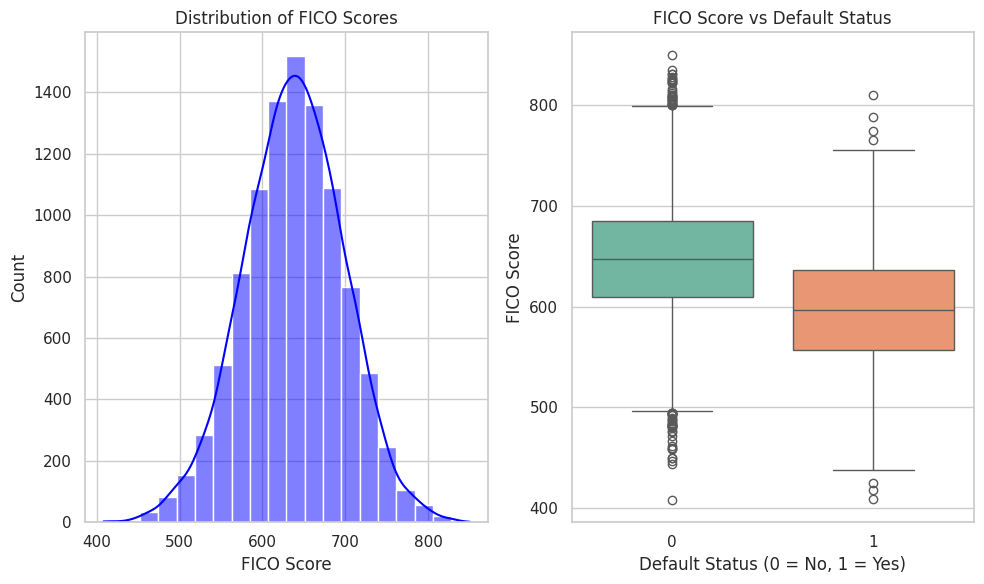

In [14]:
# Set up the figure size and theme for better visuals
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot a histogram to visualize the distribution of FICO scores
plt.subplot(1, 2, 1)
sns.histplot(df['fico_score'], bins=20, kde=True, color='blue')
plt.title('Distribution of FICO Scores')
plt.xlabel('FICO Score')
plt.ylabel('Count')

# Plot a bar chart to show the relationship between FICO score and default
plt.subplot(1, 2, 2)
sns.boxplot(x=df['default'], y=df['fico_score'], palette='Set2')
plt.title('FICO Score vs Default Status')
plt.xlabel('Default Status (0 = No, 1 = Yes)')
plt.ylabel('FICO Score')

# Display the plots
plt.tight_layout()
plt.show()

In [15]:
# Define the number of buckets
num_buckets = 5

# Use pd.qcut to create equal frequency buckets
df['fico_bucket'] = pd.qcut(df['fico_score'], num_buckets, labels=False)


In [16]:
from sklearn.metrics import mean_squared_error

# Calculate the mean PD in each bucket
bucket_means = df.groupby('fico_bucket')['default'].mean()

# Predict the default for each borrower using the bucket mean
df['predicted_default'] = df['fico_bucket'].map(bucket_means)

# Calculate MSE
mse = mean_squared_error(df['default'], df['predicted_default'])
print("MSE:", mse)


MSE: 0.13623207514938135


In [17]:
# Calculate the log-likelihood for each bucket
log_likelihood = 0
for bucket in df['fico_bucket'].unique():
    bucket_data = df[df['fico_bucket'] == bucket]
    n_i = len(bucket_data)  # Total records in the bucket
    k_i = bucket_data['default'].sum()  # Defaults in the bucket
    p_i = k_i / n_i  # Probability of default in the bucket
    log_likelihood += k_i * np.log(p_i) + (n_i - k_i) * np.log(1 - p_i)

print("Log-Likelihood:", log_likelihood)


Log-Likelihood: -4321.032467949177


In [18]:
# def equal_width_binning(data, num_buckets):
#     data['bucket'] = pd.cut(data['fico_score'], bins=num_buckets, labels=False)
#     return data

# # Applying equal-width binning
# binned_data = equal_width_binning(df.copy(), 10)
# print(binned_data.head())


In [19]:
# def mse_minimization(data, num_buckets):
#     data['bucket'] = pd.qcut(data['fico_score'], q=num_buckets, labels=False, duplicates='drop')
#     bucket_means = data.groupby('bucket')['fico_score'].transform('mean')
#     mse = ((data['fico_score'] - bucket_means) ** 2).mean()
#     return data, mse

# # Applying MSE minimization
# binned_data, mse = mse_minimization(df.copy(), 10)
# print(f"MSE: {mse}")
# print(binned_data.head())